# **Bioinformatics Project - Computational Drug Discovery [Part 4] **
**Regression Models with Random Forest**

* In this Jupyter notebook, we will be building a real-life data science project that you can include in your data science portfolio. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

* In Part 4, we will be building a regression model of Coronavius inhibitors using the random forest algorithm.

# Read in data

In [38]:
import pandas as pd

In [39]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [40]:
dataset_url = '/content/gdrive/My Drive/Colab Notebooks/Project/data/bioactivity_data_3class_pIC50_fp.csv'
dataset = pd.read_csv(dataset_url)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.142668
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.026872
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.869666
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.882397
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.698970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.974694
129,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.995679
130,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.939302
131,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.970616


In [41]:
dataset.shape

(133, 882)

In [42]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Columns: 882 entries, PubchemFP0 to pIC50
dtypes: float64(1), int64(881)
memory usage: 916.6 KB


In [43]:
X = dataset.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
129,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
130,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
131,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [44]:
Y = dataset.iloc[:,-1]
Y

0      5.142668
1      5.026872
2      4.869666
3      4.882397
4      5.698970
         ...   
128    4.974694
129    4.995679
130    4.939302
131    4.970616
132    4.102923
Name: pIC50, Length: 133, dtype: float64

In [45]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Columns: 881 entries, PubchemFP0 to PubchemFP880
dtypes: int64(881)
memory usage: 915.5 KB


In [46]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 133 entries, 0 to 132
Series name: pIC50
Non-Null Count  Dtype  
--------------  -----  
133 non-null    float64
dtypes: float64(1)
memory usage: 1.2 KB


# Remove low variance features

In [47]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP12,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP33,PubchemFP34,...,PubchemFP755,PubchemFP758,PubchemFP776,PubchemFP779,PubchemFP792,PubchemFP797,PubchemFP798,PubchemFP818,PubchemFP819,PubchemFP821
0,0,0,1,1,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
1,0,0,1,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,1,1,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0,1,1,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
4,0,1,1,1,0,1,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,1,1,0,0,0,1,1,0,0,0,...,1,0,1,0,0,1,1,1,1,0
129,1,1,0,0,0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,0
130,0,1,0,0,0,1,0,0,0,0,...,1,0,1,0,0,1,1,1,1,0
131,0,1,0,0,0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,0


In [48]:
X.to_csv('descriptor_list.csv', index = False)

In [49]:
! cp descriptor_list.csv "/content/gdrive/My Drive/Colab Notebooks/Project/data"

In [50]:
! ls -l "/content/gdrive/My Drive/Colab Notebooks/Project/data"

total 5055
-rw------- 1 root root   15608 Apr 25 19:31 bioactivity_data_2class_pIC50.csv
-rw------- 1 root root   17579 Apr 25 19:13 bioactivity_data_3class_pIC50.csv
-rw------- 1 root root  248010 Mar 11 12:26 bioactivity_data_3class_pIC50_fp.csv
-rw------- 1 root root   10357 Mar 17 12:25 bioactivity_data_preprocessed.csv
-rw------- 1 root root   68403 Mar 17 12:25 bioactivity_data_raw.csv
-rw------- 1 root root     177 Apr 25 18:25 bioactivity_data_raw.gsheet
-rw------- 1 root root 3956111 Mar 17 12:28 coronavirus_model.pkl
-rw------- 1 root root  125848 Mar 17 13:20 coronavirus.png
-rw------- 1 root root   73923 Apr 26 10:28 descriptor_list.csv
-rw------- 1 root root  657635 Mar 17 13:08 logo.jpg


In [51]:
# In the app, use the following to get this same descriptor list
# of 218 variables from the initial set of 881 variables
# Xlist = list(pd.read_csv('descriptor_list.csv').columns)
# X[Xlist]

# Random Forest Regression Model

In [92]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [93]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.9000483619205131

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [94]:
print("The difference between actual and predicted values of Training Data: ",np.sqrt(mean_squared_error(Y_train,model.predict(X_train))))
y_pred_randomForest=model.predict(X_test)
randomForest_RMSE=np.sqrt(mean_squared_error(Y_test,y_pred_randomForest))
print("The difference between actual and predicted values of Testing Data: ",randomForest_RMSE)
print("--"*127)
print("It is the value which specifies the amount of the residual across the whole dataset.")
print("R2 SCORE:",model.score(X,Y))

The difference between actual and predicted values of Training Data:  0.2751261755657891
The difference between actual and predicted values of Testing Data:  0.3424086487616583
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
It is the value which specifies the amount of the residual across the whole dataset.
R2 SCORE: 0.9000483619205131


## Linear regression

In [96]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X,Y)
print("The difference between actual and predicted values of Training Data: ",np.sqrt(mean_squared_error(Y_train,model1.predict(X_train))))
Y_pred_linear=model1.predict(X_test)
linear_RMSE=np.sqrt(mean_squared_error(Y_test,Y_pred_linear))
print("The difference between actual and predicted values of Testing Data: ",linear_RMSE)
print("--"*127)
print("It is the value which specifies the amount of the residual across the whole dataset.")
print("R2 SCORE:",model1.score(X,Y))

The difference between actual and predicted values of Training Data:  0.248104715616834
The difference between actual and predicted values of Testing Data:  0.3417063576318859
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
It is the value which specifies the amount of the residual across the whole dataset.
R2 SCORE: 0.9135534751678626


## Model Prediction

In [81]:
Y_pred = model1.predict(X)
Y_pred

array([4.91659481, 5.01119753, 5.06432426, 5.19650575, 5.50684991,
       5.7205599 , 5.30150251, 5.19650575, 5.04637515, 5.19650575,
       4.94053647, 4.73139883, 4.45717185, 4.33928801, 4.31016974,
       6.1227847 , 4.91316593, 4.61798795, 4.61798795, 4.32861251,
       5.78233683, 4.48477819, 5.42175478, 5.42175478, 3.59160168,
       3.59160168, 3.63528822, 3.63528822, 3.75984559, 3.75984559,
       4.03557932, 4.03557932, 4.21614942, 4.21614942, 4.26192725,
       4.26192725, 4.41164208, 4.41164208, 4.81967873, 4.81967873,
       4.80768572, 4.80768572, 4.92569137, 4.92569137, 3.12531426,
       3.12531426, 3.48278763, 3.48278763, 3.54686637, 3.54686637,
       3.48358763, 3.48358763, 3.55515985, 3.55515985, 3.67759844,
       3.67759844, 3.72357778, 3.72357778, 3.67097898, 3.67097898,
       3.8766477 , 3.8766477 , 3.75362748, 3.75362748, 4.21577964,
       4.21577964, 4.34784153, 4.34784153, 4.34921894, 4.34921894,
       4.81967873, 4.81967873, 4.86880553, 4.86880553, 4.94034

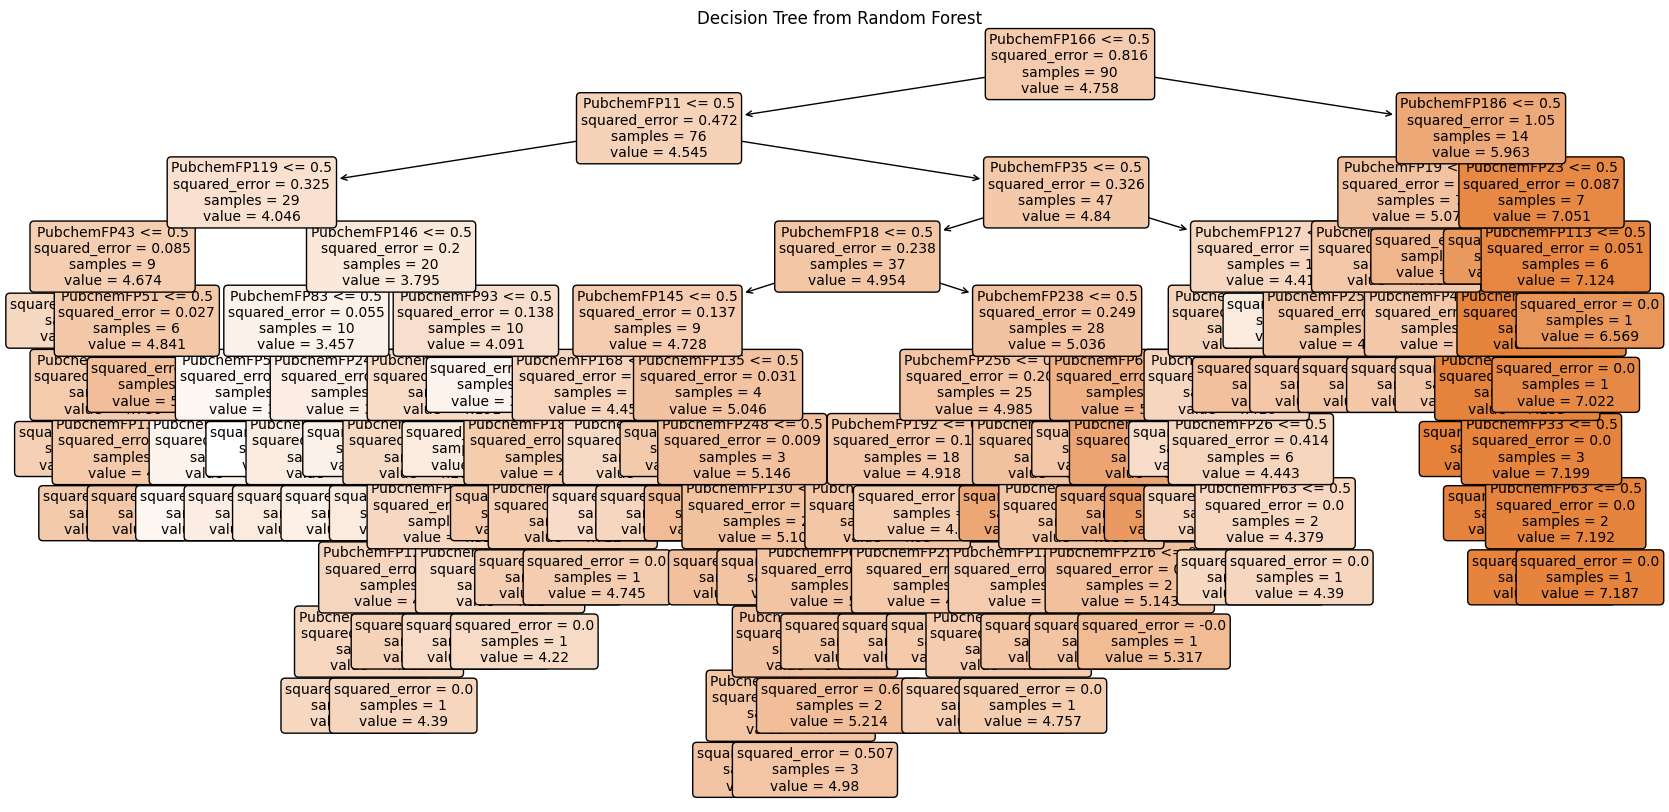

In [82]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot =model.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=dataset.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title(" Random Forest")
plt.show()

## Model Performance

In [83]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.08
Coefficient of determination (R^2): 0.90


# Data Visualization (Experimental vs Predicted pIC50 for Training Data)

In [88]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

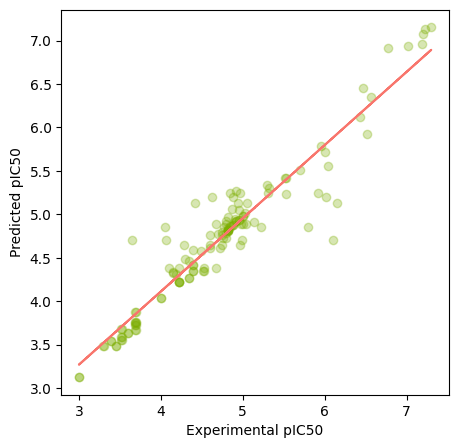

In [97]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

## Comparsion with results of Linear Regression and Random Forest with Actual Value

> Add blockquote



In [91]:
from tabulate import tabulate

results=pd.DataFrame({"y_actual":Y_test,"y_pred_linear":Y_pred_linear,
                     "y_pred_randomForest":y_pred_randomForest})
results= results.head(15)
print(tabulate(results , headers = ['Actual Values of pIC50 value' , 'Predicted Value by Linear Regression' , 'Predicted Value by Random Forest'] , tablefmt = 'pretty', showindex =False))


+------------------------------+--------------------------------------+----------------------------------+
| Actual Values of pIC50 value | Predicted Value by Linear Regression | Predicted Value by Random Forest |
+------------------------------+--------------------------------------+----------------------------------+
|      3.4559319556497243      |            3.536865234375            |        3.483587630824478         |
|      4.522878745280337       |            4.481201171875            |        4.3492189358741316        |
|             4.0              |           4.0391845703125            |        4.0355793246675375        |
|      4.920000156997057       |             4.8486328125             |        4.925691373244288         |
|      6.096910013008056       |            4.665283203125            |        4.706925957387202         |
|             5.0              |           4.91571044921875           |        4.978791731481313         |
|      4.7447274948966935      |     

# Save Model as Pickle Object

In [98]:
import pickle

In [101]:
pickle.dump(model1, open('coronavirus_model.pkl', 'wb'))

In [102]:
! cp coronavirus_model.pkl "/content/gdrive/My Drive/Colab Notebooks/Project/data"

In [103]:
! ls -l "/content/gdrive/My Drive/Colab Notebooks/Project/data"

total 1199
-rw------- 1 root root  15608 Apr 25 19:31 bioactivity_data_2class_pIC50.csv
-rw------- 1 root root  17579 Apr 25 19:13 bioactivity_data_3class_pIC50.csv
-rw------- 1 root root 248010 Mar 11 12:26 bioactivity_data_3class_pIC50_fp.csv
-rw------- 1 root root  10357 Mar 17 12:25 bioactivity_data_preprocessed.csv
-rw------- 1 root root  68403 Mar 17 12:25 bioactivity_data_raw.csv
-rw------- 1 root root    177 Apr 25 18:25 bioactivity_data_raw.gsheet
-rw------- 1 root root   7652 Apr 26 11:02 coronavirus_model.pkl
-rw------- 1 root root 125848 Mar 17 13:20 coronavirus.png
-rw------- 1 root root  73923 Apr 26 10:28 descriptor_list.csv
-rw------- 1 root root 657635 Mar 17 13:08 logo.jpg
